# Seaborn Exercises

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

## Exercises I
### Use the iris database to answer the following quesitons:

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. What does the distribution of petal lengths look like?

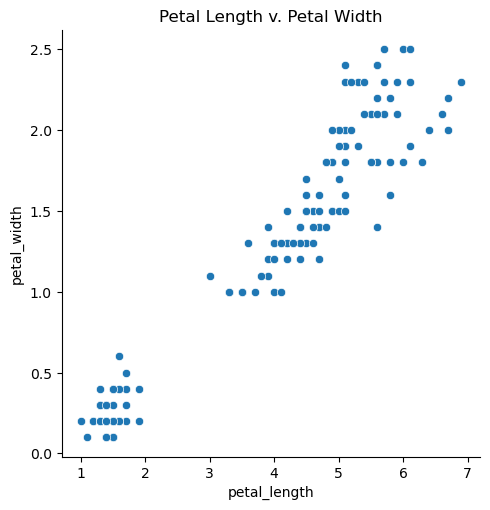

In [13]:
sns.relplot(x = 'petal_length', y = 'petal_width', data = df)
plt.title('Petal Length v. Petal Width')
plt.show()

#### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
There appears to be a strong positive correlation between petal length and width. I would guess at least 0.85.

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
It would be reasonable to predict whether or not an iris is setosa. Versicolor and Virginica are too intermingled with one another to use sepal length v width as a good classification criterion.

In [15]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


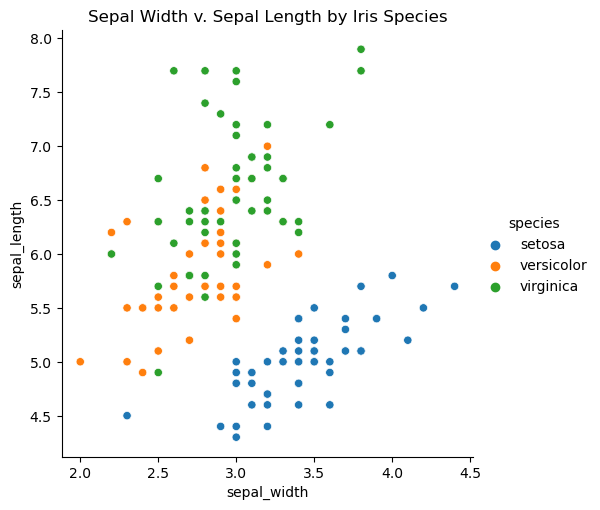

In [21]:
sns.relplot(x = 'sepal_width', y = 'sepal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Sepal Length by Iris Species')
plt.show()


#### 4. Which features would be best used to predict species?
petal_length v petal_width and sepal_width v petal_length seem to produce the best classification groupings between species even though there is still a small amount of overlap.

In [24]:
df.shape

(150, 5)

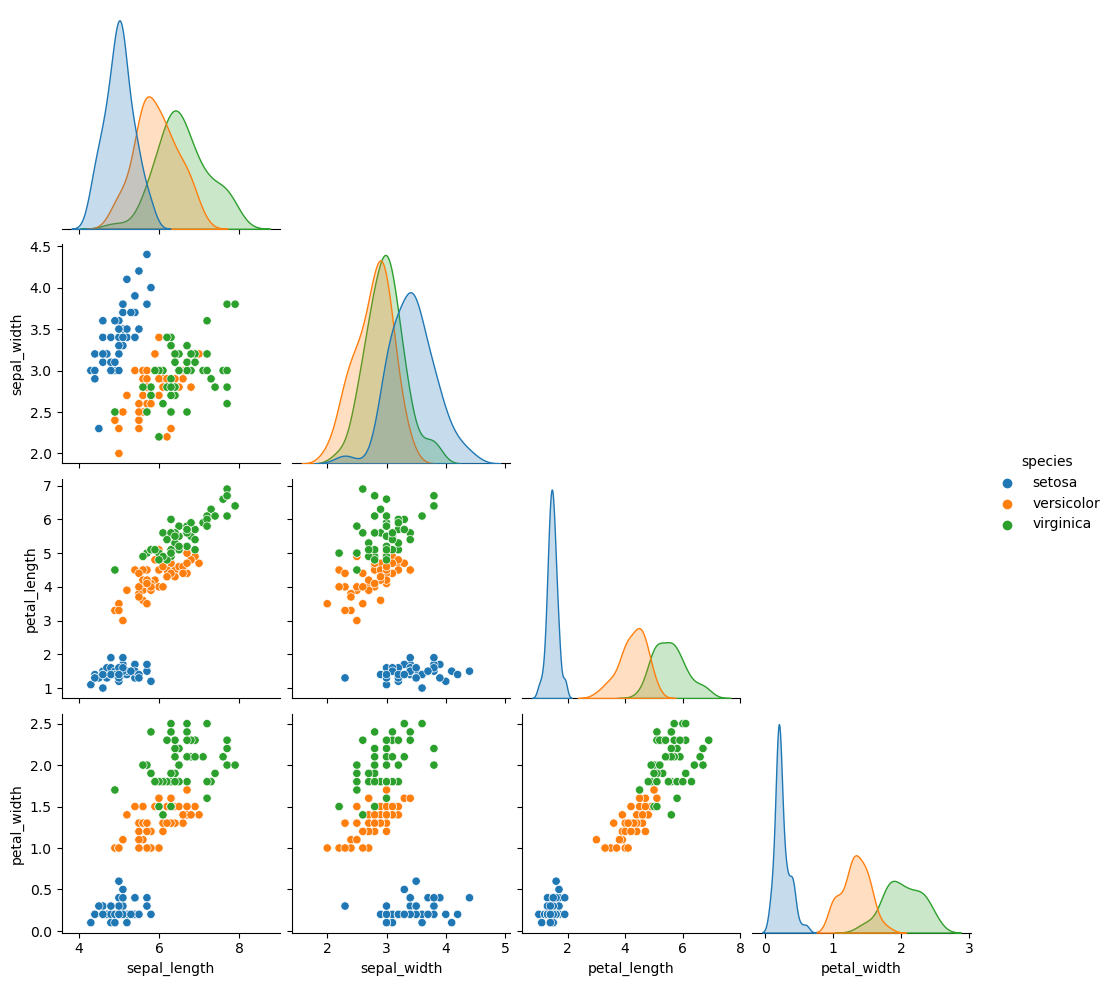

In [34]:
sns.pairplot(df, corner = True, hue = 'species')
plt.show()

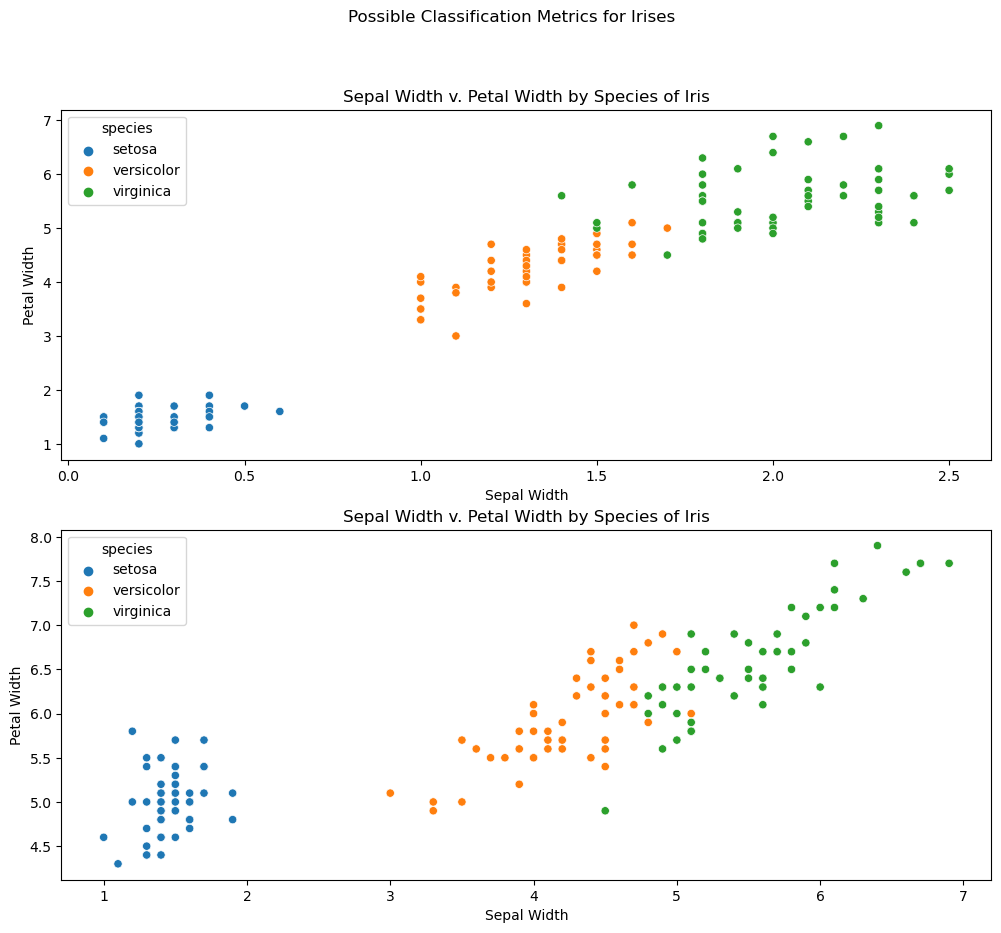

In [43]:
plt.figure(figsize = (12, 10))
plt.suptitle('Possible Classification Metrics for Irises')

plt.subplot(211)
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Petal Width by Species of Iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

plt.subplot(212)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = df, hue = 'species')
plt.title('Sepal Width v. Petal Width by Species of Iris')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show()

## Exercises II

#### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
x values are identical in I, II, III, but not IV. However std of x is equal in all groups. The mean is also nearly the same for all groups x and y.

#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


In [70]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [56]:
ans.groupby('dataset').describe().T


dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

In [62]:
ans.groupby('dataset').head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


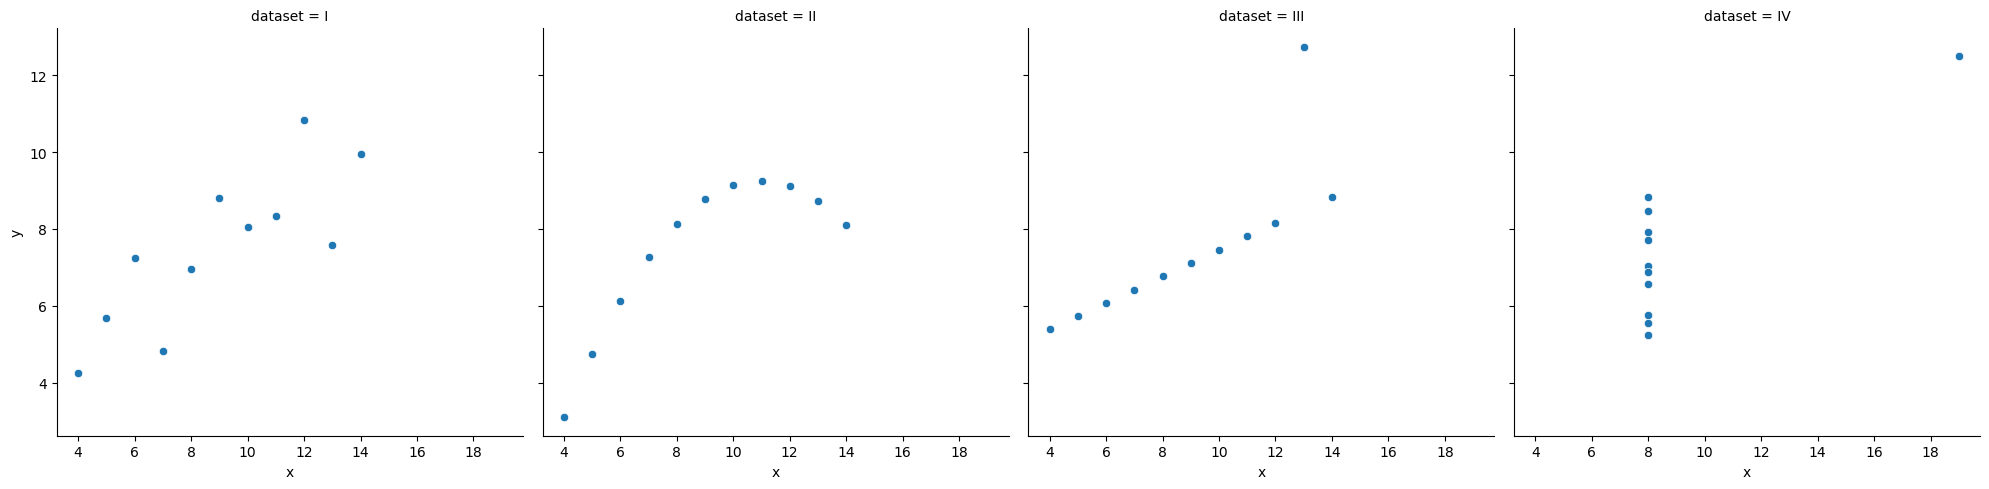

In [63]:
# the easy way

sns.relplot(x = 'x', y = 'y', data = ans, col = 'dataset')
plt.show()

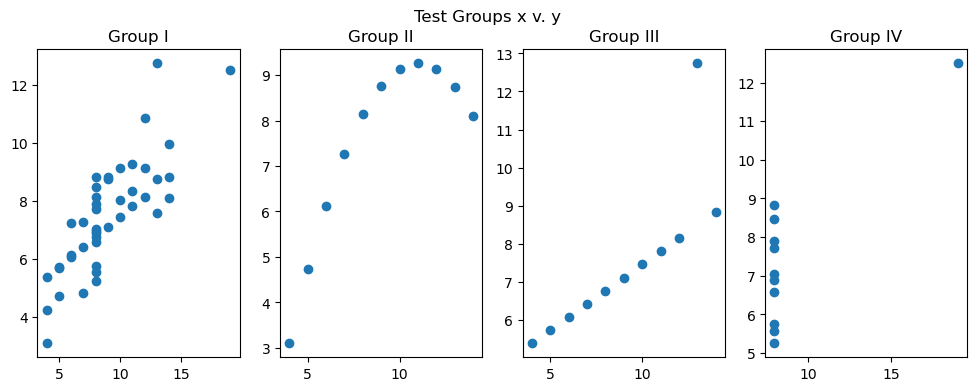

In [74]:
# the hard way

plt.figure(figsize = (12, 4))
plt.suptitle('Test Groups x v. y')

plt.subplot(141)
plt.scatter('x', 'y', data = ans)
plt.title('Group I')

plt.subplot(142)
plt.scatter('x', 'y', data = ans[ans.dataset == 'II'])
plt.title('Group II')

plt.subplot(143)
plt.scatter('x', 'y', data = ans[ans.dataset == 'III'],)
plt.title('Group III')

plt.subplot(144)
plt.scatter('x', 'y', data = ans[ans.dataset == 'IV'],)
plt.title('Group IV')
plt.show()

#### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.



In [75]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [77]:
ins = data('InsectSprays')
ins

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


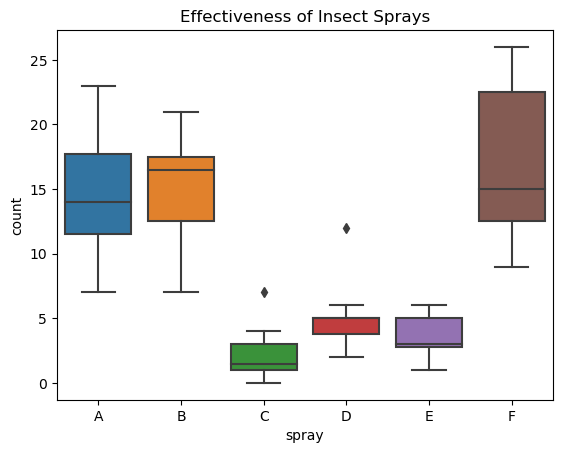

Text(0.5, 1.0, 'Effectiveness of Insect Sprays')

In [83]:
sns.boxplot(data = ins, x = 'spray', y = 'count')
plt.show()
plt.title('Effectiveness of Insect Sprays')

#### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?




In [85]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [86]:
sw = data('swiss')
sw

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4
